In [1]:
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
os.chdir("F:/Data Science/predict-credit-card-spent-1")

In [5]:
data = pd.read_excel("Data Set.xlsx")

In [6]:
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [7]:
data.shape

(5000, 130)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(30), int64(98), object(2)
memory usage: 5.0+ MB


In [9]:
#Data Understanding 
#These will help you to see all records as well as columns in the data set
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.10,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.00,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.00,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,2,2,0,68,6,January,10,1,1,0,24,5,0,196,5.278115,5,8.0,7.934080,2.071167,7.745920,2.047166,0,1,0,-1,-1,1,4,4,0,0,0,0,0,0,1,1,24,4,1,1,0,64.5,3,0,0,5,

# As we have 130 columns it will be a little difficult to analyze the data, so using pandas profiling library

credit_report=pandas_profiling.ProfileReport(data)
credit_report.to_file('credit_report.html')

# Columns to remove based on pandas profiling analysis

In [10]:
data.drop(["custid","lncardmon","lncardten","lnequipmon","lnequipten","lntollmon","lntollten","lnwiremon","lnwireten","address","age","cardtenure","card2tenure","tenure","cardtenurecat","commute","ed","lninc","lnlongten","longten","marital","spoused"], axis=1, inplace=True)

# Columns separation

In [11]:
data.dtypes


region                 int64
townsize               int64
gender                 int64
agecat                 int64
birthmonth            object
edcat                  int64
jobcat                 int64
union                  int64
employ                 int64
empcat                 int64
retire                 int64
income                 int64
inccat                 int64
debtinc              float64
creddebt             float64
lncreddebt           float64
othdebt              float64
lnothdebt            float64
default                int64
jobsat                 int64
spousedcat             int64
reside                 int64
pets                   int64
pets_cats              int64
pets_dogs              int64
pets_birds             int64
pets_reptiles          int64
pets_small             int64
pets_saltfish          int64
pets_freshfish         int64
homeown                int64
hometype               int64
addresscat             int64
cars                   int64
carown        

credit_report=pandas_profiling.ProfileReport(data)
credit_report.to_file('credit_report1.html')

In [12]:
data.drop("equipmon", axis=1, inplace=True)

In [13]:
data[data.duplicated()]

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,retire,income,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,card2,card2type,card2benefit,card2fee,card2tenurecat,cardspent,card2spent,active,bfast,churn,longmon,lnlongmon,tollfree,tollmon,tollten,equip,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03


In [14]:
to_convert=[
"card2tenurecat",
"cars",
"commutecat", 
"edcat",
"empcat", 
"inccat",
"internet", 
"jobcat", 
"jobsat", 
"pets_birds", 
"pets_dogs", 
"pets_cats", 
"pets_freshfish", 
"pets_reptiles", 
"pets_saltfish",
"pets_small",
"polview",
"reason",
"region",
"reside",
"spousedcat",
"townsize"]

In [15]:
cat_var=["active",
"bfast",
"birthmonth",
"callcard",
"callid",
"callwait",
"carbought",
"carbuy",
"carcatvalue",
"card",
"card2",
"card2benefit",
"card2fee",
"card2tenurecat",
"card2type",
"cardbenefit",
"cardfee",
"cardtype",
"carown",
"cars",
"cartype",
"churn",
"commutebike",
"commutebus",
"commutecar",
"commutecarpool",
"commutecat",
"commutemotorcycle",
"commutenonmotor",
"commutepublic",
"commuterail",
"commutewalk",
"confer",
"default",
"ebill",
"edcat",
"empcat",
"forward",
"gender",
"homeown",
"hometype",
"inccat",
"internet",
"jobcat",
"jobsat",
"multline",
"news",
"owncd",
"owndvd",
"ownfax",
"owngame",
"ownipod",
"ownpc",
"ownpda",
"owntv",
"ownvcr",
"pager",
"pets_birds",
"pets_dogs",
"pets_cats",
"pets_freshfish",
"pets_reptiles",
"pets_saltfish",
"pets_small",
"polcontrib",
"polparty",
"polview",
"reason",
"region",
"reside",
"response_01", 
"response_02",
"response_03",
"retire",
"spousedcat",
"telecommute",
"tollfree",
"townsize",
"union",
"voice",
"vote",
"addresscat",
"agecat", 
"wireless",
"equip"]

In [16]:
len(cat_var)

85

In [17]:
data_cat=data[cat_var]

In [18]:
data_cat

,active,bfast,birthmonth,callcard,callid,callwait,carbought,carbuy,carcatvalue,card,card2,card2benefit,card2fee,card2tenurecat,card2type,cardbenefit,cardfee,cardtype,carown,cars,cartype,churn,commutebike,commutebus,commutecar,commutecarpool,commutecat,commutemotorcycle,commutenonmotor,commutepublic,commuterail,commutewalk,confer,default,ebill,edcat,empcat,forward,gender,homeown,hometype,inccat,internet,jobcat,jobsat,multline,news,owncd,owndvd,ownfax,owngame,ownipod,ownpc,ownpda,owntv,ownvcr,pager,pets_birds,pets_dogs,pets_cats,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,polcontrib,polparty,polview,reason,region,reside,response_01,response_02,response_03,retire,spousedcat,telecommute,tollfree,townsize,union,voice,vote,addresscat,agecat,wireless,equip
0,0,3,September,1,0,1,0,0,1,3,5,1,0,2,3,1,0,1,1,2,0,1,0,0,0,1,4,1,0,0,0,1,1,1,0,3,1,1,1,0,2,2,0,1,1,1,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,6,9,1,3,0,1,0,0,-1,0,1,2,1,1,1,1,2,0,1
1,1,1,May,1,1,0,0,0,1,2,4,3,0,2,1,1,0,4,1,2,1,0,1,1,1,0,1,0,1,0,0,0,0,1,1,4,1,1,0,1,3,1,4,2,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,6,0,0,0,0,1,4,9,5,2,0,0,0,0,-1,1,0,5,0,1,0,1,2,1,1
2,0,3,June,1,0,0,0,1,1,2,4,3,0,5,1,4,0,1,1,3,1,0,0,1,1,1,3,0,0,0,1,0,0,0,0,2,5,0,1,1,1,2,0,2,4,1,1,1,1,0,0,0,0,0,1,1,0,0,1,2,0,0,0,0,0,1,5,2,3,3,0,0,0,0,2,0,0,4,0,0,0,5,6,0,0
3,1,1,May,1,0,0,0,1,1,2,3,4,0,2,2,4,0,1,1,3,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,3,1,0,0,1,3,1,2,2,2,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,3,9,4,5,1,0,0,0,4,0,0,3,0,0,0,2,2,0,0
4,1,3,July,1,1,1,0,1,1,4,1,2,0,3,3,1,0,2,0,1,1,0,0,0,0,0,3,0,0,1,0,1,1,0,0,3,1,1,0,0,2,1,3,2,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,4,9,2,4,0,1,0,0,2,0,1,2,0,1,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,2,January,1,0,0,0,0,3,1,3,4,0,5,3,3,0,3,1,1,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,5,0,0,1,1,5,0,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,4,0,0,0,0,1,0,4,9,2,1,0,0,0,0,-1,0,0,2,0,0,1,4,6,0,0
4996,1,1,May,1,1,1,1,1,3,3,5,2,0,4,1,4,0,4,1,2,1,0,0,1,1,0,3,0,0,1,0,0,1,1,0,2,3,1,0,1,1,4,0,1,5,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,4,9,3,1,0,0,0,0,-1,0,1,3,0,0,0,3,5,1,0
4997,0,3,August,1,1,1,1,0,3,1,2,4,0,5,4,1,0,3,1,3,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,4,5,1,0,1,3,4,0,1,3,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,4,9,4,1,0,0,0,0,-1,0,1,5,0,0,0,5,6,0,0
4998,0,3,December,1,0,0,1,1,3,3,4,1,0,4,3,1,0,1,1,2,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,4,2,0,0,1,1,5,3,2,4,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,2,9,1,4,0,0,0,0,3,0,0,1,0,0,0,4,4,0,1


In [19]:
data_num=data[data.columns.difference(cat_var)]

In [20]:
data[to_convert].dtypes

card2tenurecat    int64
cars              int64
commutecat        int64
edcat             int64
empcat            int64
inccat            int64
internet          int64
jobcat            int64
jobsat            int64
pets_birds        int64
pets_dogs         int64
pets_cats         int64
pets_freshfish    int64
pets_reptiles     int64
pets_saltfish     int64
pets_small        int64
polview           int64
reason            int64
region            int64
reside            int64
spousedcat        int64
townsize          int64
dtype: object

In [21]:
data_cat[to_convert]=data_cat[to_convert].astype(object)

In [22]:
data_cat[to_convert]

,card2tenurecat,cars,commutecat,edcat,empcat,inccat,internet,jobcat,jobsat,pets_birds,pets_dogs,pets_cats,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,polview,reason,region,reside,spousedcat,townsize
0,2,2,4,3,1,2,0,1,1,0,0,0,0,0,0,0,6,9,1,3,-1,2
1,2,2,1,4,1,1,4,2,1,0,0,0,6,0,0,0,4,9,5,2,-1,5
2,5,3,3,2,5,2,0,2,4,0,1,2,0,0,0,0,5,2,3,3,2,4
3,2,3,1,3,1,1,2,2,2,0,0,0,0,0,0,0,3,9,4,5,4,3
4,3,1,3,3,1,1,3,2,1,0,0,0,0,0,0,0,4,9,2,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5,1,3,1,5,5,0,1,1,0,0,4,0,0,0,0,4,9,2,1,-1,2
4996,4,2,3,2,3,4,0,1,5,0,0,0,1,0,0,0,4,9,3,1,-1,3
4997,5,3,1,4,5,4,0,1,3,0,0,0,0,0,0,0,4,9,4,1,-1,5
4998,4,2,1,4,2,5,3,2,4,0,0,0,0,0,0,0,2,9,1,4,3,1


In [23]:
data_cat[to_convert].dtypes

card2tenurecat    object
cars              object
commutecat        object
edcat             object
empcat            object
inccat            object
internet          object
jobcat            object
jobsat            object
pets_birds        object
pets_dogs         object
pets_cats         object
pets_freshfish    object
pets_reptiles     object
pets_saltfish     object
pets_small        object
polview           object
reason            object
region            object
reside            object
spousedcat        object
townsize          object
dtype: object

In [24]:
data_cat=data_cat.astype(object)

# Missing value imputation

In [25]:
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x
data_num=data_num.apply(lambda x: Missing_imputation(x))

# Outlier capping

In [26]:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
data_num=data_num.apply(outlier_capping)

In [27]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card2spent   5000 non-null   float64
 1   cardmon      5000 non-null   float64
 2   cardspent    5000 non-null   float64
 3   cardten      5000 non-null   float64
 4   carvalue     5000 non-null   float64
 5   commutetime  5000 non-null   float64
 6   creddebt     5000 non-null   float64
 7   debtinc      5000 non-null   float64
 8   employ       5000 non-null   int64  
 9   equipten     5000 non-null   float64
 10  hourstv      5000 non-null   int64  
 11  income       5000 non-null   float64
 12  lncreddebt   5000 non-null   float64
 13  lnlongmon    5000 non-null   float64
 14  lnothdebt    5000 non-null   float64
 15  longmon      5000 non-null   float64
 16  othdebt      5000 non-null   float64
 17  pets         5000 non-null   int64  
 18  tollmon      5000 non-null   float64
 19  tollte

In [28]:
data_cat.townsize.dtypes

dtype('O')

In [29]:
data_cat.townsize.unique()

array([2, 5, 4, 3, 1], dtype=object)

In [30]:
data_cat.townsize.mode()

0    1
dtype: object

In [31]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   active             5000 non-null   object
 1   bfast              5000 non-null   object
 2   birthmonth         5000 non-null   object
 3   callcard           5000 non-null   object
 4   callid             5000 non-null   object
 5   callwait           5000 non-null   object
 6   carbought          5000 non-null   object
 7   carbuy             5000 non-null   object
 8   carcatvalue        5000 non-null   object
 9   card               5000 non-null   object
 10  card2              5000 non-null   object
 11  card2benefit       5000 non-null   object
 12  card2fee           5000 non-null   object
 13  card2tenurecat     5000 non-null   object
 14  card2type          5000 non-null   object
 15  cardbenefit        5000 non-null   object
 16  cardfee            5000 non-null   object


In [32]:
data_cat.townsize.iloc[961]

2

In [33]:
data_cat.townsize.value_counts()

1    1437
2    1049
3     907
4     857
5     750
Name: townsize, dtype: int64

In [34]:
data_cat=pd.get_dummies(data_cat, drop_first=True)

# data_final (combiming both num and cat data)

In [35]:
data_final=pd.concat([data_num,data_cat],axis=1)

# CV A coefficient of variation, often abbreviated as CV, is a way to measure how spread out values are in a dataset relative to the mean. It is calculated as:
#a lower coefficient of variation, it offers a better mean return relative to the standard deviation

CV = σ / μ

where:

σ: The standard deviation of dataset
μ: The mean of dataset


In [36]:
#Calculating CV for all the variables 
cv_vars = data_final.apply(lambda x: np.std(x) /np.mean(x) )

In [37]:
#cv_vars.to_csv('cv.csv')

In [38]:
#### Vars to delete bases on CV
to_delete=[
"lncreddebt",
"cars_8",
"pets_reptiles_5",
"pets_dogs_7",
"pets_birds_5",
"pets_saltfish_8",
"pets_freshfish_16",
"pets_reptiles_6",
"pets_reptiles_4",
"pets_small_7",
"pets_cats_6",
"reside_9",
"pets_saltfish_7",
"pets_saltfish_1",
"pets_small_6",
"pets_freshfish_13",
"pets_dogs_5",
"pets_freshfish_14",
"pets_cats_5",
"pets_freshfish_15",
"reside_8",
"pets_saltfish_5",
"pets_saltfish_4",
"pets_small_5",
"pets_saltfish_6",
"pets_saltfish_2",
"pets_saltfish_3",
"cars_7"]

In [39]:
#dropping the variables with high variation (CV<0.05)
#a lower coefficient of variation, it offers a better mean return relative to the standard deviation
data_final.drop(to_delete, axis=1, inplace=True)


In [40]:
data_final.shape

(5000, 221)

# Normality Checking

<AxesSubplot:>

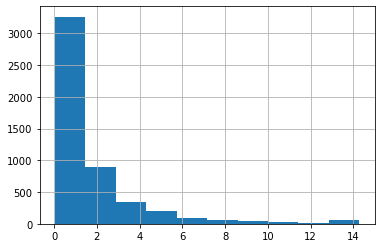

In [41]:
#Checking the Distribution of Credit_Amount
# Target variable following Exponential distribution.
data_final.creddebt.hist()

In [42]:
#Applying transformation for target variable to make it into Near normal
data_final['In_creddebt'] = np.log(data_final.creddebt)

<AxesSubplot:>

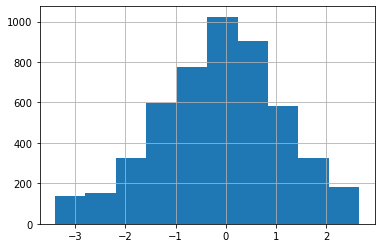

In [43]:
data_final.In_creddebt.hist()

<AxesSubplot:xlabel='In_creddebt', ylabel='Density'>

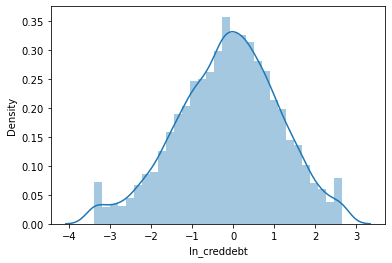

In [44]:
sns.distplot(data_final.In_creddebt)

In [45]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 222 entries, card2spent to In_creddebt
dtypes: float64(19), int64(3), uint8(200)
memory usage: 1.8 MB


# Variable Reduction

In [46]:
#using Linearity assumption (Y & X should have linear relationship)
corr_mat = data_final.corr()
#corr_mat.to_csv('corr_mat.csv')

In [47]:
corr_list=[
"spousedcat_5",
"response_03_1",
"jobsat_2",
"empcat_2",
"news_1",
"callid_1",
"tollfree_1",
"agecat_3",
"agecat_6",
"edcat_5",
"card_5",
"cardmon",
"ownfax_1",
"card2_5",
"vote_1",
"hometype_2",
"confer_1",
"forward_1",
"inccat_2",
"pager_1",
"card_2",
"callwait_1",
"edcat_4",
"longmon",
"cardten",
"card2tenurecat_2",
"homeown_1",
"callcard_1",
"card_4",
"wireless_1",
"voice_1",
"empcat_4",
"ownpda_1",
"addresscat_2",
"agecat_4",
"lnlongmon",
"multline_1",
"equipten",
"tollmon",
"card2tenurecat_5",
"wiremon",
"owntv_1",
"jobcat_2",
"empcat_5",
"jobsat_5",
"tollten",
"addresscat_4",
"wireten",
"inccat_3",
"carcatvalue_2",
"carown_1",
"employ",
"agecat_5",
"default_1",
"owncd_1",
"ownvcr_1",
"carown_0",
"owndvd_1",
"card2spent",
"retire_1",
"cardspent",
"inccat_4",
"inccat_5",
"carcatvalue_3",
"carcatvalue_1",
"carvalue",
"income",
"debtinc",
"othdebt",
"lnothdebt"]

In [48]:
len(corr_list)

70

In [49]:
#Selecting features
features = data_final[data_final.columns.difference(['In_creddebt','creddebt'])] #input variables excluding these 2 columns
target = data_final['In_creddebt']

In [50]:
#RFE

In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
#create the RFE model and select 50 attributes
rfe = RFE(lm, n_features_to_select=50)
rfe = rfe.fit(features, target)

In [52]:
#Alternative of capturing the important variables
RFE_features=features.columns[rfe.get_support()]

In [53]:
len(RFE_features)

50

In [54]:
RFE_features

Index(['agecat_4', 'agecat_6', 'birthmonth_January', 'carbought_0', 'carbought_1', 'carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card_5', 'carown_0', 'carown_1', 'cars_1', 'cars_2', 'cars_3', 'cars_4', 'cars_5', 'cars_6', 'cartype_0', 'cartype_1', 'commutenonmotor_1', 'debtinc', 'default_1', 'empcat_4', 'empcat_5', 'inccat_2', 'inccat_3', 'inccat_4', 'inccat_5', 'othdebt', 'owncd_1', 'owntv_1', 'ownvcr_1', 'pets_birds_2', 'pets_birds_3', 'pets_birds_4', 'pets_cats_4', 'pets_dogs_4', 'pets_freshfish_1', 'pets_freshfish_10', 'pets_freshfish_4', 'pets_freshfish_7', 'pets_freshfish_8', 'pets_reptiles_2', 'pets_small_2', 'pets_small_3', 'pets_small_4', 'polview_7', 'reason_3', 'retire_1', 'spousedcat_5'], dtype='object')

In [55]:
features1 = features[RFE_features]

In [56]:
type(RFE_features)

pandas.core.indexes.base.Index

In [57]:
RFE_features_list=['agecat_4', 'agecat_5', 'agecat_6', 'birthmonth_January', 'carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card_5', 'carown_1', 'cars_1', 'cars_2', 'cars_3', 'cars_4', 'cars_5', 'cars_6', 'commutemotorcycle_1', 'commutenonmotor_1', 'debtinc', 'default_1', 'empcat_4', 'empcat_5', 'inccat_2', 'inccat_3', 'inccat_4', 'inccat_5', 'othdebt', 'owncd_1', 'owntv_1', 'ownvcr_1', 'pets_birds_2', 'pets_birds_3', 'pets_birds_4', 'pets_cats_4', 'pets_dogs_4', 'pets_freshfish_1', 'pets_freshfish_10', 'pets_freshfish_4', 'pets_freshfish_7', 'pets_freshfish_8', 'pets_reptiles_2', 'pets_reptiles_3', 'pets_small_2', 'pets_small_3', 'pets_small_4', 'polview_5', 'polview_7', 'reason_2', 'reason_3', 'retire_1', 'spousedcat_5']

# F - Regression 

In [58]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features1, target)

In [59]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features1.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [60]:
f_reg_results = f_reg_results.sort_values(by=['P_Value']).head(50)

In [61]:
f_reg_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 37
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variable  50 non-null     object 
 1   F_Value   50 non-null     float64
 2   P_Value   50 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [62]:
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)

In [63]:
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]

In [64]:
f_reg_results

,Variable,F_Value,P_Value
0,agecat_4,45.792620,0.000
31,ownvcr_1,209.699624,0.000
30,owntv_1,71.761742,0.000
29,owncd_1,193.935524,0.000
28,othdebt,2238.730316,0.000
27,inccat_5,627.613726,0.000
26,inccat_4,327.179802,0.000
25,inccat_3,107.489953,0.000
48,retire_1,266.862616,0.000
23,empcat_5,79.889513,0.000


In [65]:
f_reg_list=f_reg_results.Variable.values

In [66]:
f_reg_list

array(['agecat_4', 'ownvcr_1', 'owntv_1', 'owncd_1', 'othdebt',
       'inccat_5', 'inccat_4', 'inccat_3', 'retire_1', 'empcat_5',
       'empcat_4', 'default_1', 'debtinc', 'inccat_2', 'agecat_6',
       'carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card_5',
       'carown_0', 'carown_1', 'spousedcat_5', 'cartype_0', 'cartype_1',
       'pets_cats_4', 'polview_7', 'carbought_0', 'carbought_1',
       'pets_freshfish_8', 'cars_4', 'cars_1', 'pets_freshfish_7'],
      dtype=object)

In [67]:
f_reg_list=['agecat_4', 'ownvcr_1', 'owntv_1', 'owncd_1', 'othdebt',
       'retire_1', 'inccat_4', 'inccat_3', 'inccat_2', 'empcat_5',
       'empcat_4', 'default_1', 'debtinc', 'inccat_5', 'spousedcat_5',
       'carown_1', 'card_5', 'carcatvalue_3', 'carcatvalue_2',
       'carcatvalue_1', 'agecat_5', 'agecat_6', 'polview_7',
       'pets_cats_4', 'pets_freshfish_8', 'cars_4', 'cars_1',
       'pets_freshfish_7']

In [68]:
final_vars=corr_list+RFE_features_list+f_reg_list

In [69]:
final_var_list=list(set(final_vars))

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
final_list=['debtinc',
 #'card2tenurecat_2',
 #'pets_freshfish_8',
 #'multline_1',
 #'pets_birds_4',
 #'cars_6',
 #'agecat_5',
 #'confer_1',
 #'pets_small_2',
 #'reason_3',
 #'tollfree_1',
 #'carcatvalue_1',
 #'pets_birds_2',
 #'cardten',
 'inccat_3',
 #'cars_4',
 #'pets_dogs_4',
 'default_1',
 #'othdebt',
 #'owncd_1',
 'card_5',
 #'card2spent',
 'agecat_4',
 #'pets_small_3',
 'income',
 #'hometype_2',
 #'vote_1',
 #'carcatvalue_3',
 #'tollten',
 #'longmon',
 #'homeown_1',
 #'voice_1',
 #'lnlongmon',
 #'commutenonmotor_1',
 #'carcatvalue_2',
 #'cars_2',
 #'ownfax_1',
 #'pets_cats_4',
 #'empcat_5',
 #'pets_freshfish_7',
 #'card2tenurecat_5',
 #'polview_7',
 #'cars_5',
 #'addresscat_4',
 #'callcard_1',
 #'pets_reptiles_3',
 #'pets_small_4',
 #'edcat_4',
 #'cars_1',
 #'card_4',
 #'card_2',
 'polview_5',
 #'lnothdebt',
 #'birthmonth_January',
 #'addresscat_2',
 #'cardmon',
 #'card2_5',
 #'owntv_1',
 'retire_1',
 #'news_1',
 #'carown_1',
 #'commutemotorcycle_1',
 #'ownvcr_1',
 #'agecat_3',
 #'pets_freshfish_4',
 #'edcat_5',
 #'spousedcat_5',
 #'pets_reptiles_2',
 #'wireless_1',
 #'wireten',
 #'wiremon',
 #'ownpda_1',
 #'owndvd_1',
 #'reason_2',
 #'tollmon',
 #'pager_1',
 #'inccat_2',
 #'agecat_6',
 #'pets_freshfish_1',
 #'callid_1',
 #'jobsat_5',
 'inccat_4',
 #'cars_3',
 #'inccat_5',
 #'carvalue',
 #'response_03_1',
 #'empcat_2',
 #'jobsat_2',
 #'empcat_4',
 #'callwait_1',
 #'pets_birds_3',
 #'forward_1',
 'cardspent',
 #'employ',
 #'carown_0',
 #'pets_freshfish_10',
 #'equipten',
 #'jobcat_2'
]

In [72]:
x_new=features[final_list]

In [73]:
x_new.head()

,debtinc,inccat_3,default_1,card_5,agecat_4,income,polview_5,retire_1,inccat_4,cardspent
0,11.1,0,1,0,0,31.0,0,0,0,81.66
1,18.6,0,1,0,0,15.0,0,0,0,42.60
2,9.9,0,0,0,0,35.0,1,0,0,184.22
3,5.7,0,1,0,0,20.0,0,0,0,340.99
4,1.7,0,0,0,0,23.0,0,0,0,255.10


# VIF - Multicollinearity can be detected

In [74]:
vif=pd.DataFrame()
vif["vif_factor"]=[variance_inflation_factor(x_new.values, i) for i in range(x_new.shape[1])]
vif["features"]=x_new.columns

In [75]:
vif.sort_values(by=["vif_factor"], ascending=False)

,vif_factor,features
9,3.124245,cardspent
0,2.981700,debtinc
5,2.826206,income
2,1.522092,default_1
8,1.387475,inccat_4
4,1.339684,agecat_4
1,1.293334,inccat_3
7,1.253216,retire_1
6,1.187656,polview_5
3,1.044836,card_5


In [76]:
formula='In_creddebt ~ ' + "+".join(final_list)

In [77]:
#Split the data into train & test
train, test = train_test_split(data_final, test_size=0.3, random_state=123)

In [78]:
import statsmodels.formula.api as smp

In [79]:
#ols_model = smp.ols(formula = 'y~x1+x2+x3+...', data=train).fit()
ols_model = smp.ols(formula = formula, data=train).fit()

In [80]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            In_creddebt   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     553.2
Date:                Thu, 24 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:02:44   Log-Likelihood:                -4080.7
No. Observations:                3500   AIC:                             8183.
Df Residuals:                    3489   BIC:                             8251.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9998      0.037    -54.424      0.0

In [81]:
train_predicted = np.exp(ols_model.predict(train))
test_predicted = np.exp(ols_model.predict(test))

In [82]:
train_actual = np.exp(train.In_creddebt)
test_actual = np.exp(test.In_creddebt)

In [83]:
train_MAPE = np.mean(np.abs(train_actual-train_predicted)/train_actual)
test_MAPE  = np.mean(np.abs(test_actual-test_predicted)/test_actual)
print(train_MAPE)
print(test_MAPE)

0.888612062215966
0.857834873470035


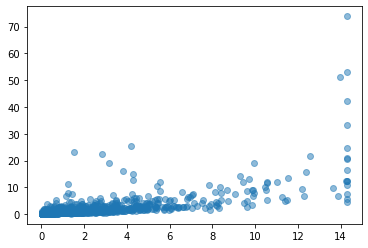

In [84]:
#colors = np.random.rand(2)
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(test_actual,test_predicted,alpha=0.5)
plt.show()

<AxesSubplot:xlabel='In_creddebt'>

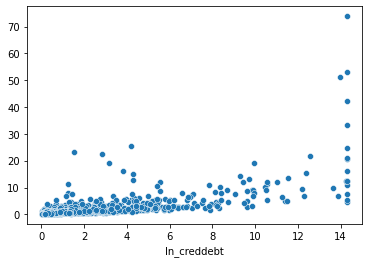

In [85]:
sns.scatterplot(test_actual,test_predicted)

<AxesSubplot:ylabel='Density'>

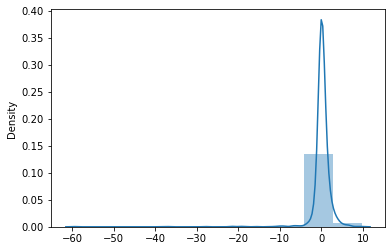

In [86]:
sns.distplot((test_actual-test_predicted),bins=10)

In [87]:
from sklearn import metrics

In [88]:
metrics.explained_variance_score(test_actual,test_predicted)

-0.42538826538645536

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC

In [90]:
?RandomForestRegressor

In [91]:
final_list_rf=['debtinc',
 'card2tenurecat_2',
 #'pets_freshfish_8',
 'multline_1',
 #'pets_birds_4',
 #'cars_6',
 #'agecat_5',
 'confer_1',
 #'pets_small_2',
 #'reason_3',
 'tollfree_1',
 #'carcatvalue_1',
 #'pets_birds_2',
 'cardten',
 'inccat_3',
 #'cars_4',
 #'pets_dogs_4',
 'default_1',
 'othdebt',
 'owncd_1',
 'card_5',
 'card2spent',
 'agecat_4',
 #'pets_small_3',
 'income',
 'hometype_2',
 'vote_1',
 #'carcatvalue_3',
 'tollten',
 'longmon',
 'homeown_1',
 'voice_1',
 'lnlongmon',
 #'commutenonmotor_1',
 #'carcatvalue_2',
 #'cars_2',
 'ownfax_1',
 #'pets_cats_4',
 'empcat_5',
 #'pets_freshfish_7',
 #'card2tenurecat_5',
 #'polview_7',
 #'cars_5',
 'addresscat_4',
 #'callcard_1',
 #'pets_reptiles_3',
 #'pets_small_4',
 #'edcat_4',
 #'cars_1',
 #'card_4',
 #'card_2',
 'polview_5',
 'lnothdebt',
 #'birthmonth_January',
 #'addresscat_2',
 'cardmon',
 #'card2_5',
 'owntv_1',
 'retire_1',
 'news_1',
 'carown_1',
 'commutemotorcycle_1',
 'ownvcr_1',
 'agecat_3',
 #'pets_freshfish_4',
 'edcat_5',
 'spousedcat_5',
 #'pets_reptiles_2',
 'wireless_1',
 'wireten',
 'wiremon',
 'ownpda_1',
 'owndvd_1',
 #'reason_2',
 'tollmon',
 'pager_1',
 #'inccat_2',
 #'agecat_6',
 #'pets_freshfish_1',
 #'callid_1',
 #'jobsat_5',
 'inccat_4',
 #'cars_3',
 #'inccat_5',
 #'carvalue',
 #'response_03_1',
 #'empcat_2',
 'jobsat_2',
 #'empcat_4',
 #'callwait_1',
 #'pets_birds_3',
 'forward_1',
 'cardspent',
 'employ',
 'carown_0',
 #'pets_freshfish_10',
 'equipten',
 #'jobcat_2'
]

In [92]:
x_train=train[final_list]
y_train=train["In_creddebt"]

In [93]:
x_test=test[final_list]
y_test=test["In_creddebt"]

In [94]:

x_train_rf=train[final_list_rf]
y_train_rf=train["In_creddebt"]

In [95]:

x_test_rf=test[final_list_rf]
y_test_rf=test["In_creddebt"]

In [96]:

#Grid search
param_grid={'n_estimators':[50,100,120,150],'max_features':[4,5,6], 'max_depth':[3,4,5,6,7,8], 'max_leaf_nodes':[5,6,7,8,9,10]}
model_rf=GridSearchCV(RandomForestRegressor(), param_grid)

In [97]:
rf = RandomForestRegressor(n_estimators=100)

I am trying gridsearch on few columns

In [98]:
model_rf.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [4, 5, 6],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 100, 120, 150]})

In [99]:
rf.fit(x_train_rf, y_train_rf)

RandomForestRegressor()

In [100]:
rf.score(x_test_rf, y_test_rf)

0.8667633784652551

In [101]:
rf_pred=rf.predict(x_test_rf)

In [102]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_rf,rf_pred))


MSE 0.20027517820690913


In [103]:
print("RMSE",np.sqrt(mean_squared_error(y_test_rf,rf_pred)))

RMSE 0.4475211483348124


In [116]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test_rf,rf_pred))))

RMSE -0.8040314835351484


In [117]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_rf,rf_pred)
print(r2)

0.8667633784652551


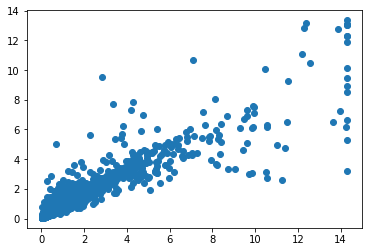

In [104]:
plt.scatter(test_actual,np.exp(rf_pred))
plt.show()

<AxesSubplot:xlabel='In_creddebt'>

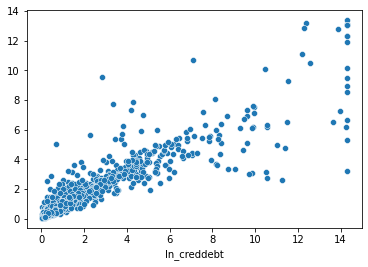

In [105]:
sns.scatterplot(test_actual,np.exp(rf_pred))

# Random forest showing better results!

<AxesSubplot:xlabel='In_creddebt', ylabel='Density'>

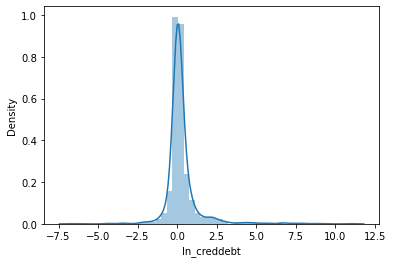

In [106]:
sns.distplot((test_actual-np.exp(rf_pred)),bins=50)

In [107]:

test_actual

2648    0.373730
2456    1.361250
4557    0.090984
4884    0.657536
92      4.133415
          ...   
3014    1.269600
734     0.289892
452     2.216313
2558    0.176946
1927    2.560896
Name: In_creddebt, Length: 1500, dtype: float64

In [108]:
np.exp(rf_pred)

array([0.38833774, 1.32377963, 0.08853332, ..., 1.87440409, 0.12764302,
       2.11965809])

# XGBoost

In [109]:
xgb=XGBRegressor()

In [110]:
xgb.fit(x_train_rf, y_train_rf)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
xgb.score(x_test_rf,y_test_rf)

0.8962152064056049

In [112]:
xgb_pred=xgb.predict(x_test_rf)

In [113]:
metrics.explained_variance_score(test_actual,np.exp(xgb_pred))

0.8283284443611729

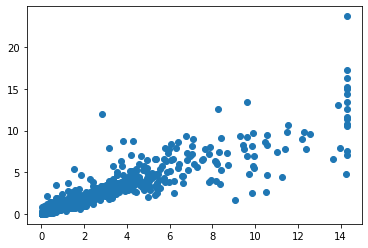

In [114]:
plt.scatter(test_actual,np.exp(xgb_pred))
plt.show()

<AxesSubplot:xlabel='In_creddebt', ylabel='Density'>

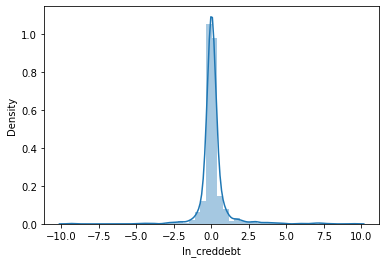

In [115]:
sns.distplot((test_actual-np.exp(xgb_pred)),bins=50)